In [2]:
import numpy as np
import keras
from keras.applications import vgg16

model =vgg16.VGG16(weights='imagenet')

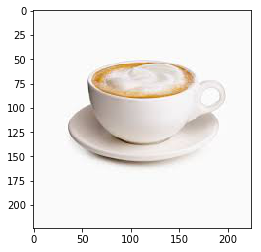

In [3]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt
%matplotlib inline
filename = "img.jpg"
org_img = load_img(filename, target_size=(model.input_shape[1], model.input_shape[2]))
plt.imshow(org_img)
plt.show()

In [4]:
from keras.applications.vgg16 import preprocess_input, decode_predictions
nrow = model.input_shape[1]
ncol = model.input_shape[2]
nchan = model.input_shape[3]
batch_shape = (1,nrow,ncol,nchan)
x = np.zeros(batch_shape)
x[0,:,:,:] = org_img

In [5]:
org_pred = model.predict(x)
dec_org_pred = decode_predictions(org_pred)
dec_org_pred


[[('n07930864', 'cup', 0.94683927),
  ('n03937543', 'pill_bottle', 0.0072032143),
  ('n04263257', 'soup_bowl', 0.0052245213),
  ('n04332243', 'strainer', 0.004388819),
  ('n04398044', 'teapot', 0.0039917952)]]

In [6]:
import tensorflow as tf
model.inputs

[<tf.Tensor 'input_1:0' shape=(?, 224, 224, 3) dtype=float32>]

In [7]:
def FGSM_attack(img, target, step, num_steps, model):
    inputs = model.inputs[0]
    for s in range(0,num_steps):
        print("Step: ",s)
        x = model.inputs[0]
        y = model(x)
        cost = tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=target)
        grad, = tf.gradients(cost, x)
        normalized_grad = tf.sign(grad)
        normalized_grad = tf.stop_gradient(normalized_grad)
        adv_x = x - step *  normalized_grad
        adv_x = tf.clip_by_value(adv_x, 0, 256)
        adv_val = adv_x.eval({x:img})
        c = cost.eval({x:img})
        print("Cost: {}".format(c[0]))
        img = adv_val
    return img

In [20]:
import random
t = np.zeros([1,1000])
r = random.randint(0,1000)
t[0,r] = 1
decode_predictions(t)

[[('n03770439', 'miniskirt', 1.0),
  ('n02319095', 'sea_urchin', 0.0),
  ('n02395406', 'hog', 0.0),
  ('n02391049', 'zebra', 0.0),
  ('n02389026', 'sorrel', 0.0)]]

In [21]:
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    xn = FGSM_attack(x, t, 1, 500, model)
# model.inputs[0]

Step:  0
Cost: 6.907977104187012
Step:  1
Cost: 6.907893657684326
Step:  2
Cost: 6.907792091369629
Step:  3
Cost: 6.907688617706299
Step:  4
Cost: 6.907583713531494
Step:  5
Cost: 6.907467842102051
Step:  6
Cost: 6.907355308532715
Step:  7
Cost: 6.907238006591797
Step:  8
Cost: 6.9071245193481445
Step:  9
Cost: 6.907012462615967
Step:  10
Cost: 6.906895160675049
Step:  11
Cost: 6.906781196594238
Step:  12
Cost: 6.906667709350586
Step:  13
Cost: 6.906549453735352
Step:  14
Cost: 6.906430721282959
Step:  15
Cost: 6.906320571899414
Step:  16
Cost: 6.906202793121338
Step:  17
Cost: 6.906073093414307
Step:  18
Cost: 6.905960559844971
Step:  19
Cost: 6.905838489532471
Step:  20
Cost: 6.905702114105225
Step:  21
Cost: 6.905573844909668
Step:  22
Cost: 6.9054460525512695
Step:  23
Cost: 6.9053144454956055
Step:  24
Cost: 6.905183792114258
Step:  25
Cost: 6.905056476593018
Step:  26
Cost: 6.9049248695373535
Step:  27
Cost: 6.904771327972412
Step:  28
Cost: 6.904639720916748
Step:  29
Cost: 6.90

Cost: 6.7541184425354
Step:  238
Cost: 6.751837730407715
Step:  239
Cost: 6.750519275665283
Step:  240
Cost: 6.749464988708496
Step:  241
Cost: 6.747422695159912
Step:  242
Cost: 6.745936393737793
Step:  243
Cost: 6.7442169189453125
Step:  244
Cost: 6.742546558380127
Step:  245
Cost: 6.740532875061035
Step:  246
Cost: 6.739753723144531
Step:  247
Cost: 6.737534523010254
Step:  248
Cost: 6.735721111297607
Step:  249
Cost: 6.734567165374756
Step:  250
Cost: 6.732456684112549
Step:  251
Cost: 6.731045246124268
Step:  252
Cost: 6.729142189025879
Step:  253
Cost: 6.7278547286987305
Step:  254
Cost: 6.7263970375061035
Step:  255
Cost: 6.724050998687744
Step:  256
Cost: 6.722417831420898
Step:  257
Cost: 6.7207746505737305
Step:  258
Cost: 6.719119548797607
Step:  259
Cost: 6.717447757720947
Step:  260
Cost: 6.715266704559326
Step:  261
Cost: 6.714202404022217
Step:  262
Cost: 6.711961269378662
Step:  263
Cost: 6.710256576538086
Step:  264
Cost: 6.708406925201416
Step:  265
Cost: 6.7057361602

Cost: 6.26559591293335
Step:  473
Cost: 6.263993263244629
Step:  474
Cost: 6.262411594390869
Step:  475
Cost: 6.2607245445251465
Step:  476
Cost: 6.257964611053467
Step:  477
Cost: 6.256649494171143
Step:  478
Cost: 6.2543745040893555
Step:  479
Cost: 6.2528204917907715
Step:  480
Cost: 6.250464916229248
Step:  481
Cost: 6.24941349029541
Step:  482
Cost: 6.246710777282715
Step:  483
Cost: 6.245900630950928
Step:  484
Cost: 6.243020057678223
Step:  485
Cost: 6.241897106170654
Step:  486
Cost: 6.240063667297363
Step:  487
Cost: 6.238467693328857
Step:  488
Cost: 6.236383438110352
Step:  489
Cost: 6.234774112701416
Step:  490
Cost: 6.2325215339660645
Step:  491
Cost: 6.2315497398376465
Step:  492
Cost: 6.2297749519348145
Step:  493
Cost: 6.227790355682373
Step:  494
Cost: 6.225943565368652
Step:  495
Cost: 6.2243757247924805
Step:  496
Cost: 6.222722053527832
Step:  497
Cost: 6.221248626708984
Step:  498
Cost: 6.219001293182373
Step:  499
Cost: 6.217103958129883


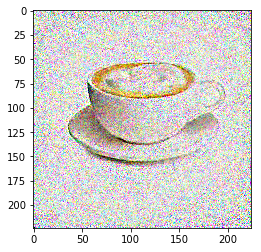


5.14984e-08
7.61648e-07


[[('n07930864', 'cup', 0.51946408),
  ('n03443371', 'goblet', 0.14564985),
  ('n04263257', 'soup_bowl', 0.038988464),
  ('n04476259', 'tray', 0.036438342),
  ('n03775546', 'mixing_bowl', 0.036420312)]]

In [22]:
plt.imshow(array_to_img(xn[0]))
plt.show()
print()
print(org_pred[0,r])
print(model.predict(xn)[0,r])
decode_predictions(model.predict(xn))